In [14]:
#import necessary libraries
import pandas as pd
from pandas import DataFrame
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (15, 5)
from pylab import*

In [2]:
#read the csv file
df = pd.read_csv('mergeddatasettweets_for_method1.csv')
print("Number of tweets: ",len(df['tweet']))
df.head(5)

Number of tweets:  154117


,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,timezone,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,0,1594481807558430720,1594481807558430720,1.668989e+12,2022-11-21 00:04:21,0,NaN,Data as a new design material: ethical implica...,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1,1592919585577373698,1592919585577373698,1.668617e+12,2022-11-16 16:36:38,0,NaN,"IT graduates, the monies are steeped on your s...",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,2,1592871515858808832,1592871492479782916,1.668605e+12,2022-11-16 13:25:38,0,NaN,"Third, the last principle of generosity experi...",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,3,1591974859567165440,1591493075565948940,1.668391e+12,2022-11-14 02:02:38,0,NaN,@CubanBTC @Sim_Startup_ @cantrell •Computer vi...,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CubanBTC', 'name': 'CubanHod...",NaN,NaN,NaN,NaN
4,4,4,1591809985071104001,1591809979819773952,1.668352e+12,2022-11-13 15:07:29,0,NaN,Non-tech roles: • Human Resources • Artificia...,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [3]:
#considering only the column 'hashtags' from the original dataframe for further analysis
df1 = df[['hashtags']]
df1.tail(5)

,hashtags
154112,['machine']
154113,"['machinelearning', 'ml', 'mobileapps', 'appdev']"
154114,[]
154115,"['data', 'bi', 'ai', 'ml', 'ux']"
154116,"['aitechworld', 'connectedworld', 'iot', 'smar..."


In [5]:
#some data cleaning
#removing the punctuations from 'hashtags'
df1['hashtags'] = df1['hashtags'].str.replace('[^\w\s]','')
df1.tail(5)

,hashtags
154112,machine
154113,machinelearning ml mobileapps appdev
154114,
154115,data bi ai ml ux
154116,aitechworld connectedworld iot smartcities iot...


In [10]:
#splitting every tag and adding them to the separate list
#creating empty list
hashtagslist = []  
#looping over every cell in hashtags
for x in df1.hashtags:
    #if cell is not empty
    if pd.notnull(x):  
        #splitting each cell into separate hashtags
        tags = x.split() 
        #for each tag in the cell
        for x in tags:   
            #add '#' symbol to each tag
            x = '#'+ x
            #making the tag lower case     
            x = x.lower()   
            #adding tag to the empty list-'hashtagslist' created 
            hashtagslist.append(x)    
#printing number of items in the list
print(len(hashtagslist))      
#showing first 10 items in the list
hashtagslist[:10]                          


706548


['#ai',
 '#machinelearning',
 '#datascience',
 '#artificialintelligence',
 '#artificialintelligence',
 '#ai',
 '#machinelearning',
 '#data',
 '#datascience',
 '#hiring']

In [11]:
#count of the tags 
Series(hashtagslist).value_counts()

#artificialintelligence    51888
#ai                        48044
#art                       29915
#aiart                     26635
#digitalart                18137
                           ...  
#banking                       1
#vizag                         1
#mgiep                         1
#unesco                        1
#smarthomes                    1
Length: 1707, dtype: int64

In [20]:
#creating the dataframe for the count list 
hashtagscount = DataFrame(Series(hashtagslist).value_counts()) 
hashtagscount.columns = ['tag_frequency']                     
print(len(hashtagscount))
hashtagscount

1707


,tag_frequency
#artificialintelligence,51888
#ai,48044
#art,29915
#aiart,26635
#digitalart,18137
...,...
#banking,1
#vizag,1
#mgiep,1
#unesco,1


In [13]:
#Exporting the results to csv
hashtagscount.to_csv('hashtags and their count.csv')

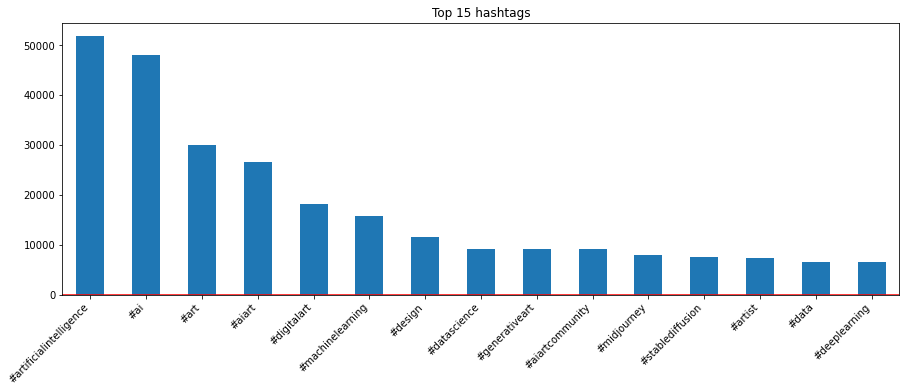

In [18]:
#visualizing the top 15 hashtags
hashtagscount['tag_frequency'].head(15).plot(kind='bar')
axhline(0, color='r')
title('Top 15 hashtags')
xticks(fontsize = 10,rotation = 45, ha='right')
savefig('15 most popular tags.png', bbox_inches='tight', dpi=300, format='png')
show()

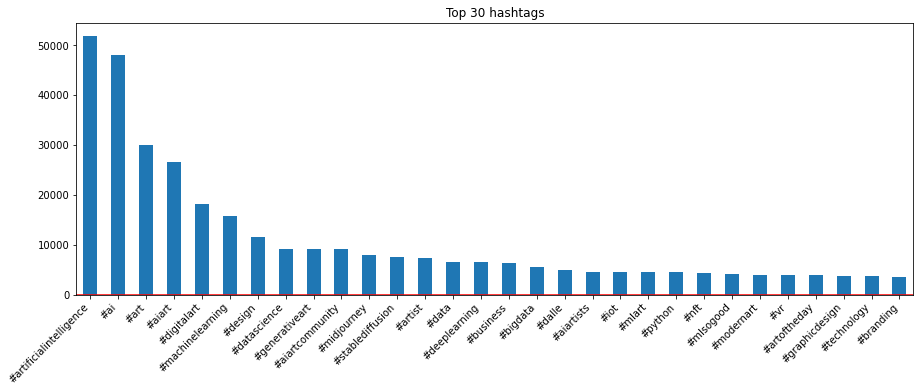

In [17]:
#visualizing the top 30 hashtags
hashtagscount['tag_frequency'].head(30).plot(kind='bar')
axhline(0, color='r')
title('Top 30 hashtags')
xticks(fontsize = 10,rotation = 45, ha='right')
savefig('30 most popular tags.png', bbox_inches='tight', dpi=300, format='png')
show()